In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from typing import List, NamedTuple
import sys

sys.path.append("./")
sys.path.append("../")
sys.path.append("../..")
from utils.tabnet_proba import TabNetRegressorProba

import os
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from collections import defaultdict

In [22]:
data_folder = "../data/2020-2024/{}/"
version_folder = "../data/2020-2024/{}/version_{}/"
figure_path = "../results/figures/data_overview/"

files = {
    "CE": "TransnetBW/cleansed_2020-01-01_to_2023-12-31.h5",
    "Nordic": "Fingrid/cleansed_2020-01-01_to_2023-12-31.h5",
}

areas=["CE", "Nordic"]
area_names = ["Continental Europe", "Nordic"]
targets = ["f_rocof", "f_ext", "f_msd", "f_integral"]
target_names = ["RoCoF", "Nadir", "MSD", "Integral"]

In [23]:
input_cols = [
    "gen_other",
    "gen_solar",
    "gen_wind_on",
    "gen_waste",
    "gen_nuclear",
    "gen_biomass",
    "gen_gas",
    "gen_run_off_hydro",
    "gen_oil",
    "gen_pumped_hydro",
    "gen_other_renew",
    "gen_reservoir_hydro",
    "gen_hard_coal",
    "gen_wind_off",
    "gen_geothermal",
    "gen_lignite",
    "load",
    "gen_coal_gas",
    "total_gen",
    "synchronous_gen",
    "load_ramp",
    "total_gen_ramp",
    "other_ramp",
    "solar_ramp",
    "wind_on_ramp",
    "waste_ramp",
    "nuclear_ramp",
    "biomass_ramp",
    "gas_ramp",
    "run_off_hydro_ramp",
    "oil_ramp",
    "pumped_hydro_ramp",
    "other_renew_ramp",
    "reservoir_hydro_ramp",
    "hard_coal_ramp",
    "wind_off_ramp",
    "geothermal_ramp",
    "lignite_ramp",
    "coal_gas_ramp",
    "forecast_error_wind_on",
    "forecast_error_wind_off",
    "forecast_error_solar",
    "forecast_error_total_gen",
    "forecast_error_load",
    "forecast_error_load_ramp",
    "forecast_error_total_gen_ramp",
    "forecast_error_wind_off_ramp",
    "forecast_error_wind_on_ramp",
    "forecast_error_solar_ramp",
    "solar_day_ahead",
    "wind_on_day_ahead",
    "scheduled_gen_total",
    "prices_day_ahead",
    "load_day_ahead",
    "wind_off_day_ahead",
    "month",
    "weekday",
    "hour",
    "load_ramp_day_ahead",
    "total_gen_ramp_day_ahead",
    "wind_off_ramp_day_ahead",
    "wind_on_ramp_day_ahead",
    "solar_ramp_day_ahead",
    "price_ramp_day_ahead",
    "gen_fossil_peat",
    "fossil_peat_ramp",
    "residual",
]


input_col_names = [
    "Generation other",
    "Solar generation",
    "Onshore wind generation",
    "Waste generation",
    "Nuclear generation",
    "Biomass generation",
    "Gas generation",
    "Run-off-river hydro generation",
    "Oil generation",
    "Pumped hydro generation",
    "Other renewable generation",
    "Reservoir hydro generation",
    "Hard coal generation",
    "Wind offshore generation",
    "Geothermal generation",
    "Lignite generation",
    "Load",
    "Coal gas generation",
    "Total generation",
    "Synchronous generation",
    "Load ramp",
    "Total generation ramp",
    "Other ramp",
    "Solar ramp",
    "Onshore wind ramp",
    "Waste ramp",
    "Nuclear ramp",
    "Biomass ramp",
    "Gas ramp",
    "Run-off-river hydro ramp",
    "Oil ramp",
    "Pumped hydro ramp",
    "Other renewable ramp",
    "Reservoir hydro ramp",
    "Hard coal ramp",
    "Offshore wind ramp",
    "geothermal_ramp",
    "Lignite ramp",
    "Coal gas ramp",
    "Forecast error onshore wind",
    "Forecast error offshore wind",
    "Forecast error solar",
    "Forecast error total generation",
    "Forecast error load",
    "Forecast error load ramp",
    "Forecast error generation ramp",
    "Forecast error offshore wind ramp",
    "Forecast error onshore wind ramp",
    "Forecast error solar ramp",
    "Solar day-ahead",
    "Onshore wind day-ahead",
    "Scheduled generation",
    "Prices day-ahead",
    "Load day-ahead",
    "Offshore wind day-ahead",
    "Month",
    "Weekday",
    "Hour",
    "Load ramp day-ahead",
    "Generation ramp day-ahead",
    "Offshore wind ramp day-ahead",
    "Onshore wind ramp day-ahead",
    "Solar ramp day-ahead",
    "Price ramp day-ahead",
    "Fossil peat generation",
    "Fossil peat ramp",
    "Residual",
]

input_col_names = dict(zip(input_cols, input_col_names))
input_col_names_units = [
    "Generation other [GW]",
    "Solar generation [GW]",
    "Onshore wind generation [GW]",
    "Waste generation [GW]",
    "Nuclear generation [GW]",
    "Biomass generation [GW]",
    "Gas generation [GW]",
    "Run-off-river hydro generation [GW]",
    "Oil generation [GW]",
    "Pumped hydro generation [GW]",
    "Other renewable generation [GW]",
    "Reservoir hydro generation [GW]",
    "Hard coal generation [GW]",
    "Wind offshore generation [GW]",
    "Geothermal generation [GW]",
    "Lignite generation [GW]",
    "Load [GW]",
    "Coal gas generation [GW]",
    "Total generation [GW]",
    "Synchronous generation [GW]",
    "Load ramp [GW/h]",
    "Total generation ramp [GW/h]",
    "Other ramp [GW/h]",
    "Solar ramp [GW/h]",
    "Onshore wind ramp [GW/h]",
    "Waste ramp [GW/h]",
    "Nuclear ramp [GW/h]",
    "Biomass ramp [GW/h]",
    "Gas ramp [GW/h]",
    "Run-off-river hydro ramp [GW/h]",
    "Oil ramp [GW/h]",
    "Pumped hydro ramp [GW/h]",
    "Other renewables ramp [GW/h]",
    "Reservoir hydro ramp [GW/h]",
    "Hard coal ramp [GW/h]",
    "Offshore wind ramp [GW/h]",
    "geothermal_ramp [GW/h]",
    "Lignite ramp [GW/h]",
    "coal_gas_ramp [GW/h]",
    "Forecast error onshore wind [GW]",
    "Forecast error offshore wind [GW]",
    "Forecast error solar [GW]",
    "Forecast error total generation [GW]",
    "Forecast error load [GW]",
    "Forecast error load ramp [GW]",
    "Forecast error generation ramp [GW/h]",
    "Forecast error offshore wind ramp [GW/h]",
    "Forecast error onshore wind ramp [GW/h]",
    "Forecast error solar ramp [GW/h]",
    "Solar day-ahead [GW]",
    "Onshore wind day-ahead [GW]",
    "Scheduled generation [GW]",
    "Prices day-ahead [£/MWh]",
    "Load day-ahead [GW]",
    "Offshore wind day-ahead [GW]",
    "Month",
    "Weekday",
    "Hour",
    "Load ramp day-ahead [GW/h]",
    "Generation ramp day-ahead [GW/h]",
    "Offshore wind ramp day-ahead [GW/h]",
    "Onshore wind ramp day-ahead [GW/h]",
    "Solar ramp day-ahead [GW/h]",
    "Price ramp day-ahead [£/MWh/h]",
    "Fossil peat generation [GW]",
    "Fossil peat ramp [GW/h]",
    "Residual",
]

input_col_names_units_general = [
    "Generation other [GW]",
    "Solar generation [GW]",
    "Onshore wind generation [GW]",
    "Waste generation [GW]",
    "Nuclear generation [GW]",
    "Biomass generation [GW]",
    "Gas generation [GW]",
    "Run-off-river hydro generation [GW]",
    "Oil generation [GW]",
    "Pumped hydro generation [GW]",
    "Other renewable generation [GW]",
    "Reservoir hydro generation [GW]",
    "Hard coal generation [GW]",
    "Wind offshore generation [GW]",
    "Geothermal generation [GW]",
    "Lignite generation [GW]",
    "Load [GW]",
    "Coal gas generation [GW]",
    "Total generation [GW]",
    "synchronous_gen [GW]",
    "Load ramp [GW/h]",
    "Total generation ramp [GW/h]",
    "Other ramp [GW/h]",
    "Solar ramp [GW/h]",
    "Onshore wind ramp [GW/h]",
    "Waste ramp [GW/h]",
    "Nuclear ramp [GW/h]",
    "Biomass ramp [GW/h]",
    "Gas ramp [GW/h]",
    "Run-off-river hydro ramp [GW/h]",
    "Oil ramp [GW/h]",
    "Pumped hydro ramp [GW/h]",
    "Other renewables ramp [GW/h]",
    "Reservoir hydro ramp [GW/h]",
    "Hard coal ramp [GW/h]",
    "Offshore wind ramp [GW/h]",
    "geothermal_ramp [GW/h]",
    "Lignite ramp [GW/h]",
    "coal_gas_ramp [GW/h]",
    "Forecast error onshore wind [GW]",
    "Forecast error offshore wind [GW]",
    "Forecast error solar [GW]",
    "Forecast error total generation [GW]",
    "Forecast error load [GW]",
    "Forecast error load ramp [GW]",
    "Forecast error generation ramp [GW/h]",
    "Forecast error offshore wind ramp [GW/h]",
    "Forecast error onshore wind ramp [GW/h]",
    "Forecast error solar ramp [GW/h]",
    "Solar day-ahead [GW]",
    "Onshore wind day-ahead [GW]",
    "Scheduled generation [GW]",
    "Prices day-ahead [Currency/MWh]",
    "Load day-ahead [GW]",
    "Offshore wind day-ahead [GW]",
    "Month",
    "Weekday",
    "Hour",
    "Load ramp day-ahead [GW/h]",
    "Generation ramp day-ahead [GW/h]",
    "Offshore wind ramp day-ahead [GW/h]",
    "Onshore wind ramp day-ahead [GW/h]",
    "Solar ramp day-ahead [GW/h]",
    "Price ramp day-ahead [Currency/MWh/h]",
    "Fossil peat generation [GW]",
    "Fossil peat ramp [GW/h]",
    "Residual",
]

input_col_names_units = dict(zip(input_cols, input_col_names_units))
input_col_names_units_general = dict(zip(input_cols, input_col_names_units_general))
#input_col_names_units = dict(zip(input_cols, input_col_names_units))
#input_col_names_units_general = dict(zip(input_cols, input_col_names_units_general))

input_rescale_factors = pd.Series(index=input_cols, data=1 / 1000)
input_rescale_factors.loc[
    ["weekday", "hour", "month", "prices_day_ahead", "price_ramp_day_ahead"]
] = 1


In [31]:
columns_ce = pd.read_hdf("/Users/hf3672/Documents/PHD/prob-xai-power-grid/data/2020-2024/CE/version_2024-05-19/X_train_full.h5").rename(columns=input_col_names).columns
columns_nordic = pd.read_hdf("/Users/hf3672/Documents/PHD/prob-xai-power-grid/data/2020-2024/Nordic/version_2024-05-19/X_train_full.h5").rename(columns=input_col_names).columns

In [34]:
def list_differences(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    
    unique_to_list1 = set1 - set2
    
    unique_to_list2 = set2 - set1
    
    common_items = set1 & set2
    
    return unique_to_list1, unique_to_list2, common_items

unique_to_ce, unique_to_nordic, common_items = list_differences(columns_ce, columns_nordic)

print("Unique to CE:", unique_to_ce)
print("Unique to Nordic:", unique_to_nordic)
print("Common items:", common_items)

Unique to CE: {'Geothermal generation', 'Coal gas ramp', 'Lignite generation', 'geothermal_ramp', 'Pumped hydro generation', 'Pumped hydro ramp', 'Lignite ramp', 'Coal gas generation'}
Unique to Nordic: {'Fossil peat generation', 'Fossil peat ramp'}
Common items: {'Biomass ramp', 'Load', 'Forecast error offshore wind ramp', 'Other renewable generation', 'Other ramp', 'Run-off-river hydro ramp', 'Gas ramp', 'Month', 'Nuclear ramp', 'Weekday', 'Prices day-ahead', 'Gas generation', 'Hour', 'Solar generation', 'Solar ramp', 'Oil generation', 'Total generation ramp', 'Synchronous generation', 'Load ramp', 'Forecast error offshore wind', 'Offshore wind ramp', 'Forecast error generation ramp', 'Oil ramp', 'Scheduled generation', 'Wind offshore generation', 'Forecast error solar', 'Reservoir hydro generation', 'Forecast error load', 'Solar day-ahead', 'Generation ramp day-ahead', 'Run-off-river hydro generation', 'Nuclear generation', 'Total generation', 'Forecast error solar ramp', 'Onshore w

In [28]:
len(columns_nordic)

58

In [4]:
explain_folder = "../../explanations/{}/version_{}_{}/target_{}/explanations{}/"

scaled_str = "_scaled"

In [5]:
inds_gen = pd.Index([])
inds_other = pd.Index([])

for i, area in enumerate(areas):

    raw_input_data = pd.read_hdf(data_folder.format(area) + "raw_input_data.h5")
    inds_gen = inds_gen.union(raw_input_data.filter(regex="^gen").columns)

    inds_other = inds_other.union(
        raw_input_data.drop(columns=raw_input_data.filter(regex="^gen").columns).columns
    )

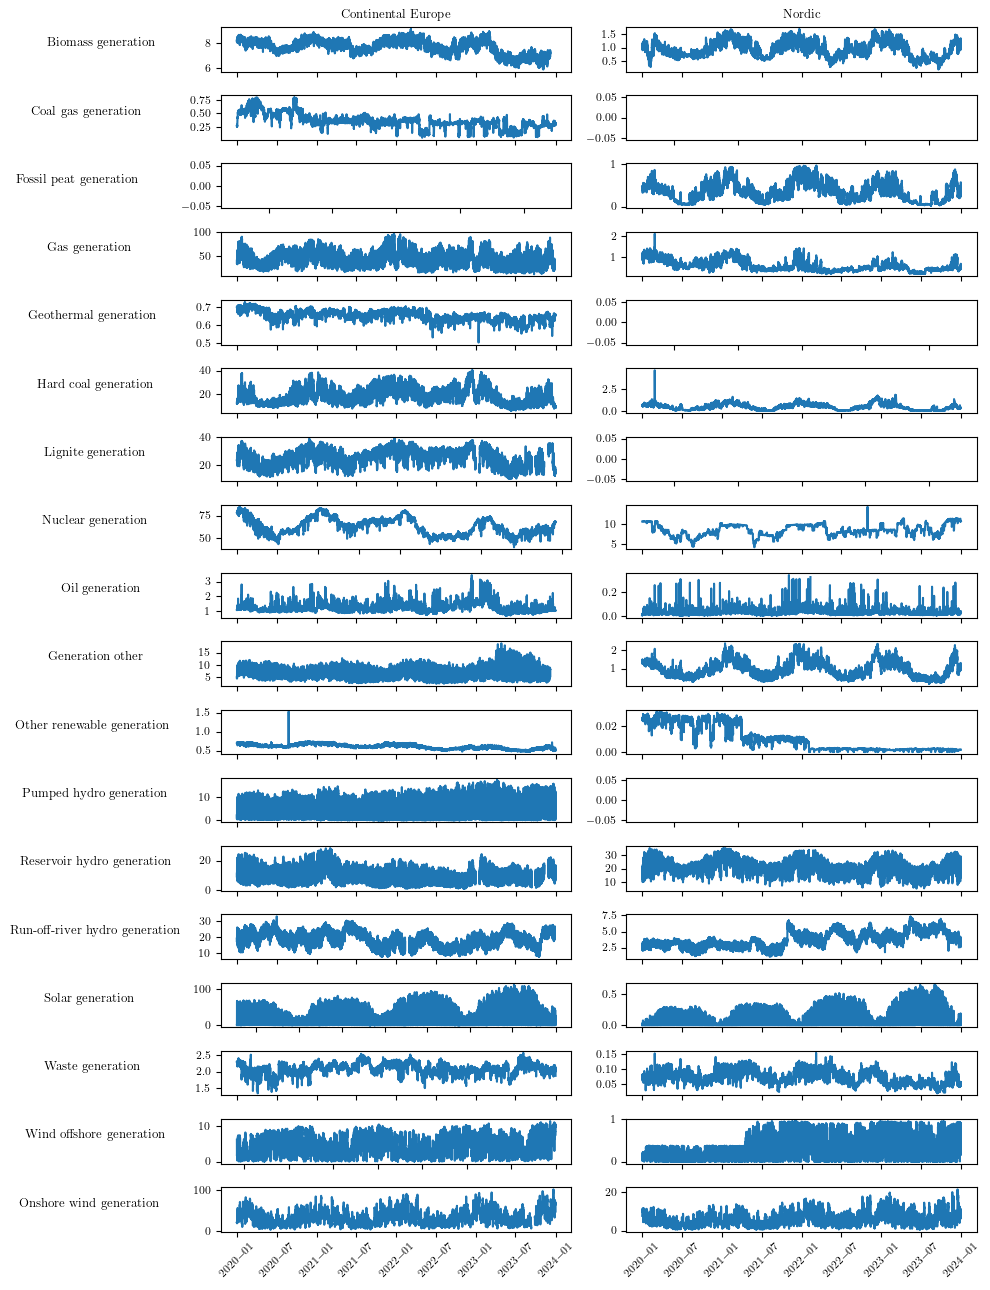

In [6]:
# Enable LaTeX formatting in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(inds_gen.shape[0], 2, figsize=(10, 13))

for j, area in enumerate(areas):

    raw_input_data = pd.read_hdf(data_folder.format(area) + "raw_input_data.h5")
    raw_input_data = raw_input_data.mul(
        input_rescale_factors.reindex(raw_input_data.columns)
    )

    ax[0, j].set_title(area_names[j], fontsize=9)

    for i, ind in enumerate(inds_gen):

        if ind in raw_input_data.columns:
            ax[i, j].plot(raw_input_data.loc[:, ind])
        else:
            ax[i, j].plot([])

        if j == 0:
            ax[i, j].set_ylabel(
                input_col_names[ind], fontsize=9, rotation=0, labelpad=75
            )

        ax[i, j].tick_params(axis="both", labelsize=8)

        if i != (inds_gen.shape[0] - 1):
            ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(axis='x', labelsize=8, rotation=45)
        #ax[i, j].tick_params(axis='y', labelsize=8)
plt.tight_layout()
#plt.savefig(figure_path + "generation_features.pdf", dpi=100)
plt.show()

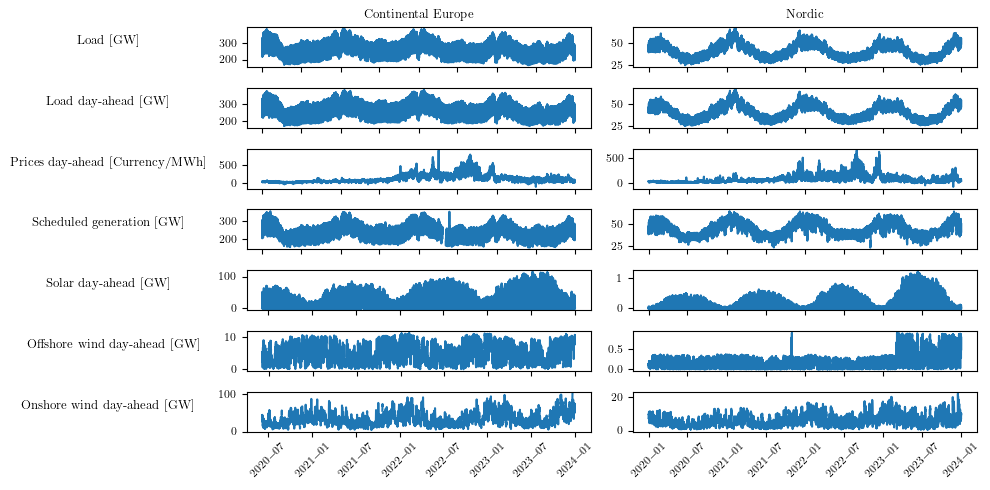

In [7]:
fig, ax = plt.subplots(inds_other.shape[0], 2, figsize=(10, 5))

for j, area in enumerate(areas):

    raw_input_data = pd.read_hdf(data_folder.format(area) + "raw_input_data.h5")
    raw_input_data = raw_input_data.mul(
        input_rescale_factors.reindex(raw_input_data.columns)
    )

    ax[0, j].set_title(area_names[j], fontsize=9)

    for i, ind in enumerate(inds_other):

        if ind in raw_input_data.columns:
            ax[i, j].plot(raw_input_data.loc[:, ind])
        else:
            ax[i, j].plot([])

        if j == 0:
            ax[i, j].set_ylabel(
                input_col_names_units_general[ind], fontsize=9, rotation=0, labelpad=80
            )

        if i != (inds_other.shape[0] - 1):
            ax[i, j].set_xticklabels([])

        ax[i, j].tick_params(axis='x', labelsize=8, rotation=45)
        ax[i, j].tick_params(axis='y', labelsize=8)

plt.tight_layout()
#plt.savefig(figure_path + "load_features.pdf", dpi=100)
plt.show()

## Explain High and Low Uncertainty
* only NGBoost since it has slightly better performance

In [8]:
class Config(NamedTuple):
    data_version: str = "2024-05-19"
    res_version: str = "2024-06-24"
    model_type: str = "_full"
    model_combination: str = "ngb"
    model_name: str = "NGBoost"
    predictors_prob: List[str] = ["baseline", "predictions"]
    model_names_prob: List[str] =["Baseline", "NGBoost (full model)"],
    model_names_det: List[str] =["Daily profile", "NGBoost (full model)"],    
    predictors_det: List[str] = ["daily_profile", "predictions"]
    scaler_str: str = "yeo_johnson"
    scaled: str = "_scaled"
    explanations: str ="_partition" # for tabnet proba it can be "_partition" because of the two explainers

config_ngb = Config()

In [9]:
area="CE"
target="f_rocof"
data_folder = "../data/2020-2024/{}/version_{}/yeo_johnson/"
explain_folder = "../explanations/{}/version_{}_{}/target_{}/explanations{}/"
fit_folder = ("../results/model_fit/{}/version_{}_{}"+ "/"+ "target_{}/")
X_test = pd.read_hdf(
                    data_folder.format(area, config_ngb.data_version, config_ngb.scaler_str)
                    + f"X_test_full{config_ngb.scaled}.h5")
X_test.rename(columns=input_col_names, inplace=True)

y_test = pd.read_hdf(
                    data_folder.format(area, config_ngb.data_version, config_ngb.scaler_str)
                    + f"y_test{config_ngb.scaled}.h5")
y_pred = pd.read_hdf("../results/model_fit/CE/version_2024-06-24_ngb/yeo_johnson/target_f_rocof/y_pred.h5")

In [10]:
y_pred["deviation"] = y_pred["predictions_upper"]- y_pred["predictions_lower"]
y_pred.head()

,daily_profile,mean_predictor,std_predictor,f_rocof,predictions,predictions_upper,predictions_lower,deviation
2023-02-27 03:00:00+01:00,-0.313479,2.388311e-17,1.000028,0.027361,-0.250736,0.791936,-1.293408,2.085343
2022-05-16 18:00:00+02:00,0.894478,2.388311e-17,1.000028,1.059625,1.045712,2.290115,-0.198692,2.488806
2021-06-17 16:00:00+02:00,0.765051,2.388311e-17,1.000028,0.005120,0.443570,1.556067,-0.668926,2.224993
2020-09-11 03:00:00+02:00,-0.313479,2.388311e-17,1.000028,-0.107773,-0.240666,0.548772,-1.030103,1.578875
2023-07-22 07:00:00+02:00,1.117311,2.388311e-17,1.000028,1.160095,0.333217,1.916691,-1.250257,3.166948


In [11]:
def get_shap_df(area, config, target, shap_type):
    X_test = pd.read_hdf(
                        data_folder.format(area, config.data_version, config.scaler_str)
                        + f"X_test_full{config.scaled}.h5")
    X_test.rename(columns=input_col_names, inplace=True)
    shap_vals = np.load(
            explain_folder.format(area, config.res_version, config.model_combination, target, config.explanations)
            + f"shap_values_{shap_type}.npy"
        )
    if len(shap_vals.shape) == 3 and shap_vals.shape[2] == 1:
        shap_vals = shap_vals.reshape(shap_vals.shape[0], shap_vals.shape[1])

    shap_vals = pd.DataFrame(
                    data=shap_vals, index=X_test.index, columns=X_test.columns
                )
    return shap_vals

In [12]:
shap_vals_mean = get_shap_df(area, config_ngb, target, "mean")
shap_vals_std = get_shap_df(area, config_ngb, target, "std")

In [13]:
ind_max = y_pred["deviation"].idxmax()

In [14]:
ind_min = y_pred["deviation"].idxmin()

In [15]:
y_pred.mean_predictor.mean()

2.38831091037691e-17

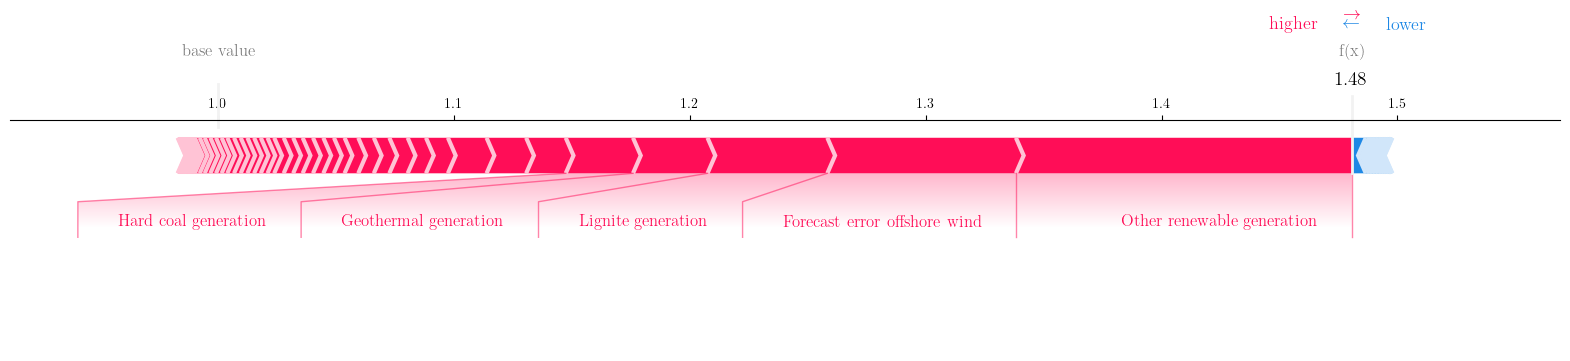

In [16]:
f = shap.force_plot(
    y_pred.std_predictor.mean(),
    shap_vals_std.values[np.argwhere(X_test.index == ind_max)[0, 0]],
    X_test.loc[ind_max].index,
    matplotlib=True,
    show=True,
    figsize=(20, 3),
)
#plt.savefig(figure_path + "sketch_of_shap.svg", bbox_inches="tight")

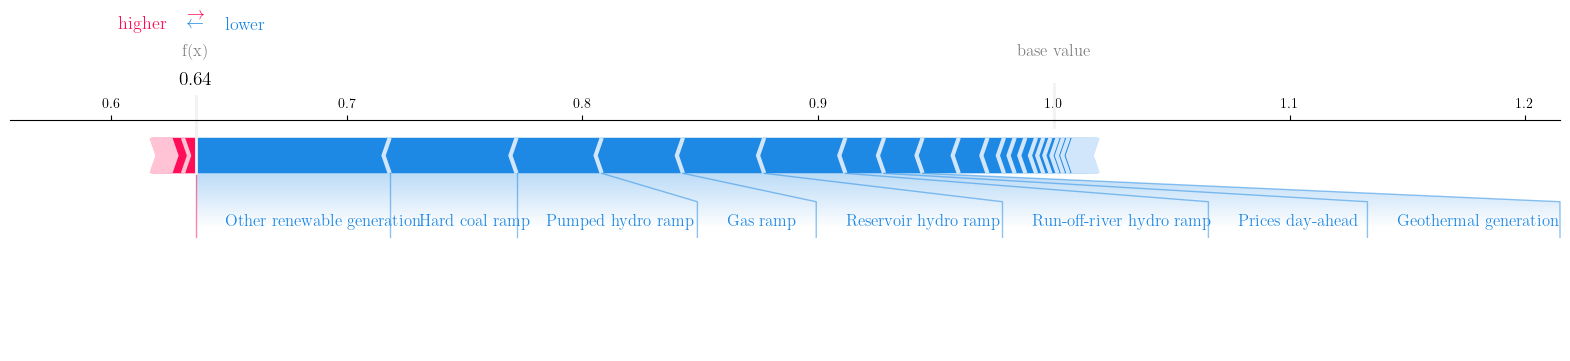

In [17]:
f = shap.force_plot(
    y_pred.std_predictor.mean(),
    shap_vals_std.values[np.argwhere(X_test.index == ind_min)[0, 0]],
    X_test.loc[ind_min].index,
    matplotlib=True,
    show=True,
    figsize=(20, 3),
)

In [18]:
data_folder

'../../data/2020-2024/{}/version_{}/yeo_johnson/'

In [19]:
area = "CE"
freq = (
    -50
    + pd.read_hdf("../../Frequency_data_preparation/{}".format(files[area])).loc[
        "2020-01-01":"2023-12-31"
    ]
)
input_data = pd.read_hdf(data_folder.format(area) + "input_actual.h5").join(
    pd.read_hdf(data_folder.format(area) + "input_forecast.h5")
)
outputs = pd.read_hdf(data_folder.format(area) + "outputs.h5")

IndexError: Replacement index 1 out of range for positional args tuple

In [24]:
i = 111
ind = X_test.sort_index().index[X_test.sort_index().index.hour.isin([19,20,21])][i]
print(ind)
#print(pd.read_hdf(fit_folder.format(area, config_ngb.data_version, "f_ext") + "y_pred.h5").loc[ind])

2021-02-05 19:00:00+01:00


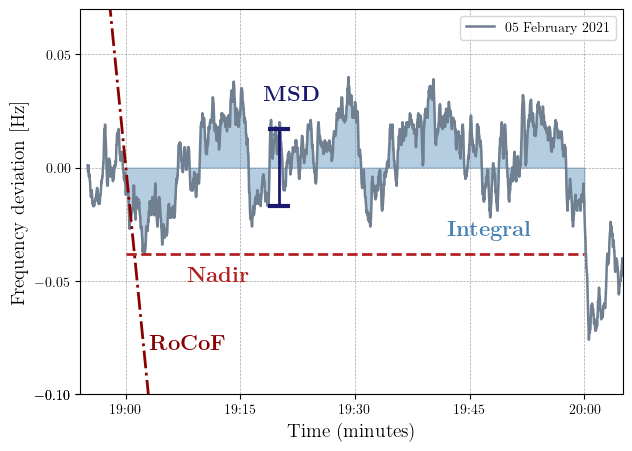

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import shap

# Enable LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

f = lambda x, a, b: a * x + b

fig, ax = plt.subplots(figsize=(7, 5))

# Updated color scheme
crocof = "#8B0000"  # Dark red
cnadir = "#B22222"  # Firebrick
cintegral = "#4682B4"  # Steelblue
cmsd = "#191970"  # Midnightblue
fcolor = "#708090"  # Slate gray

############## Sketch of targets ####################

# Main frequency line
ax.plot(
    np.arange(-5 * 60, 3601 + 5 * 60) / 60,
    freq.loc[ind - pd.DateOffset(minutes=5): ind + pd.DateOffset(minutes=65)],
    color=fcolor,
    linewidth=1.8,
    linestyle="-",
    label="05 February 2021",
)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# RoCoF
smoothed_df_dt = (
    freq.loc[ind - pd.DateOffset(minutes=60): ind + pd.DateOffset(minutes=60)]
    .diff()
    .rolling(60, center=True)
    .mean()
)
smoothed_df_dt = smoothed_df_dt.loc[
    ind - pd.DateOffset(minutes=1): ind + pd.DateOffset(minutes=1)
]
arg_ext = np.argmax(smoothed_df_dt.abs().values)
rocof = smoothed_df_dt.iloc[arg_ext]
ax.plot(
    np.arange(-5 * 60, 5 * 60) / 60,
    f(np.arange(-5 * 60, 5 * 60), rocof, 0),
    linewidth=2,
    color=crocof,
    linestyle="dashdot",
)
ax.annotate(r"\textbf{RoCoF}", [3, -0.08], color=crocof, fontsize=16)  # Adjusted position

# Nadir
nadir = freq.loc[ind - pd.DateOffset(minutes=5): ind + pd.DateOffset(minutes=60)].min()
ax.plot([0, 60], [nadir, nadir], linewidth=2, color=cnadir, linestyle="dashed")
ax.annotate(r"\textbf{Nadir}", [8, -0.05], color=cnadir, fontsize=16)  # Adjusted position

# Integral
plt.fill_between(
    np.arange(0, 3601) / 60,
    np.zeros(3601),
    freq.loc[ind: ind + pd.DateOffset(minutes=60)],
    color=cintegral,
    alpha=0.4,
)
plt.annotate(r"\textbf{Integral}", [42, -0.03], color=cintegral, fontsize=16)  # Adjusted position

# MSD
msd_val = (freq.loc[ind: ind + pd.DateOffset(minutes=60)] ** 2).mean()
ax.errorbar(
    [20],
    [0],
    [np.sqrt(msd_val)],
    capsize=8,
    linewidth=2,
    capthick=3,
    color=cmsd,
    zorder=100,
)
ax.annotate(r"\textbf{MSD}", [18, 0.03], color=cmsd, fontsize=16)  # Adjusted position

# Axis limits, labels, and ticks
ax.set_xlim([-6, 65])
ax.set_ylim([-0.1, 0.07])
ax.set_yticks([-0.1, -0.1, -0.05, 0, 0.05])
ax.set_xlabel(r"Time (minutes)", fontsize=14)
ax.set_ylabel(r"Frequency deviation [Hz]", fontsize=14)
plt.legend()
plt.xticks([0, 15, 30, 45, 60], [r"19:00", r"19:15", r"19:30", r"19:45", r"20:00"])

# Display figure
plt.savefig(figure_path + "sketch_of_targets_v2.pdf", bbox_inches="tight")


In [65]:
figure_path

'../../results/figures/data_overview/'

## Target Histograms

In [3]:
import pandas as pd
outputs_ce = pd.read_hdf("../data/2020-2024/CE/outputs.h5")
outputs_nordic = pd.read_hdf("../data/2020-2024/Nordic/outputs.h5")

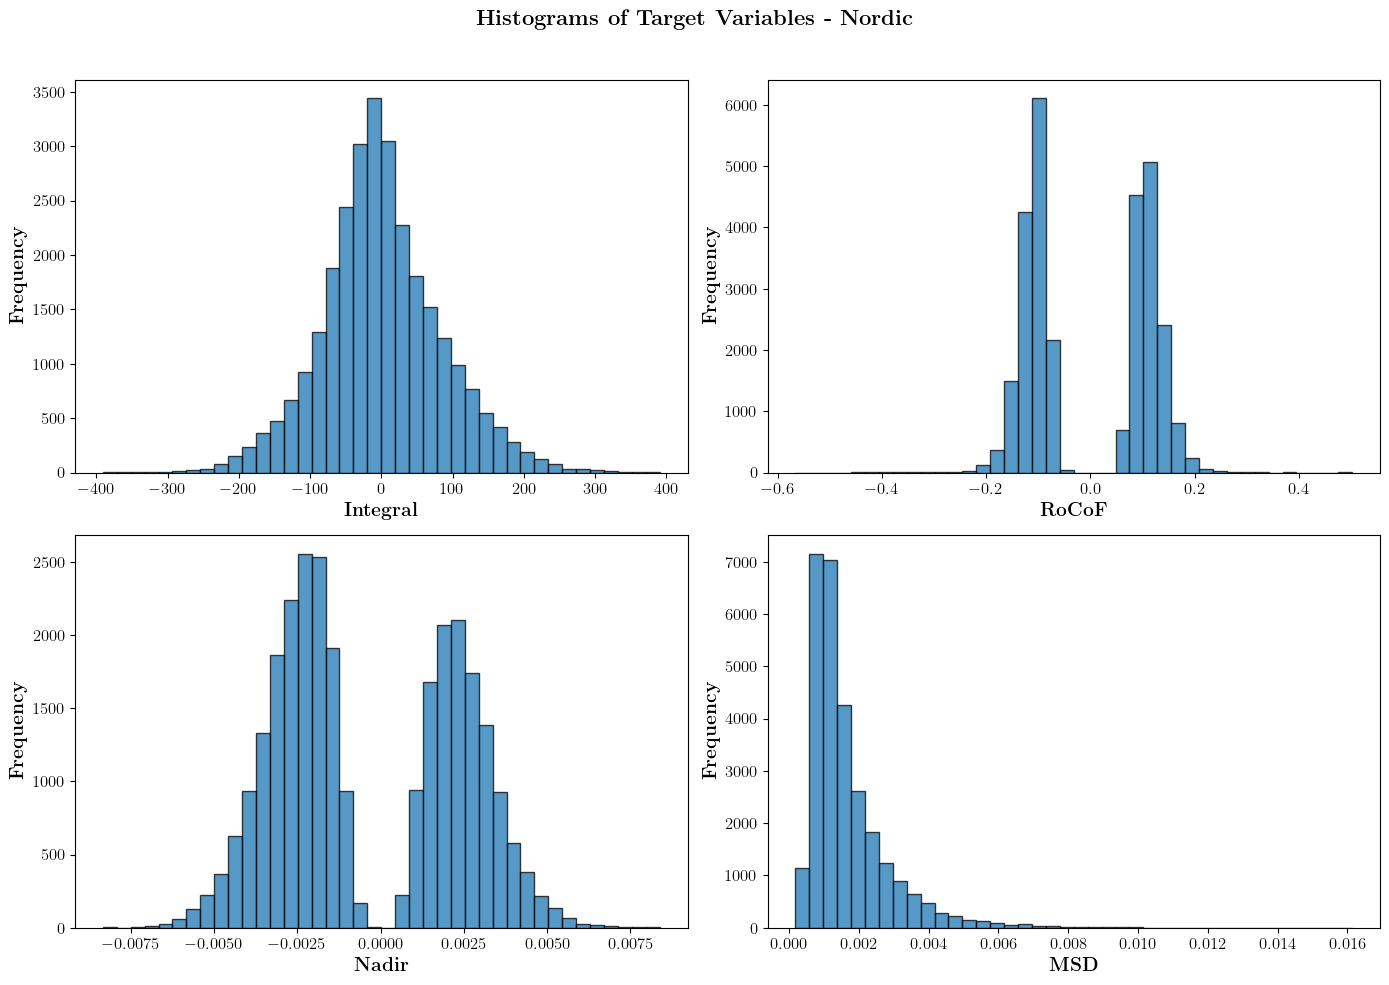

In [19]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})
plt.figure(figsize=(14, 10))

# Define target columns and custom names
targets = ["f_integral", "f_ext", "f_rocof", "f_msd"]
target_names = ["Integral", "RoCoF", "Nadir", "MSD"]

# Loop through targets and plot histograms
for i, (target, name) in enumerate(zip(targets, target_names), 1):
    plt.subplot(2, 2, i)
    plt.hist(outputs_nordic[target].dropna(), bins=40, alpha=0.75, edgecolor='black')
    # Set labels with larger font size
    plt.xlabel(f"\\textbf{{{name}}}", fontsize=14)
    plt.ylabel("\\textbf{Frequency}", fontsize=14)
    plt.xticks(fontsize=12)  # Increase font size for x-axis ticks
    plt.yticks(fontsize=12)  # Increase font size for y-axis ticks

plt.suptitle("\\textbf{Histograms of Target Variables - Nordic}", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
#plt.tight_layout()

plt.savefig("../../results/figures/target_histograms_ce.pdf", dpi=300, bbox_inches='tight', format="pdf")

plt.show()


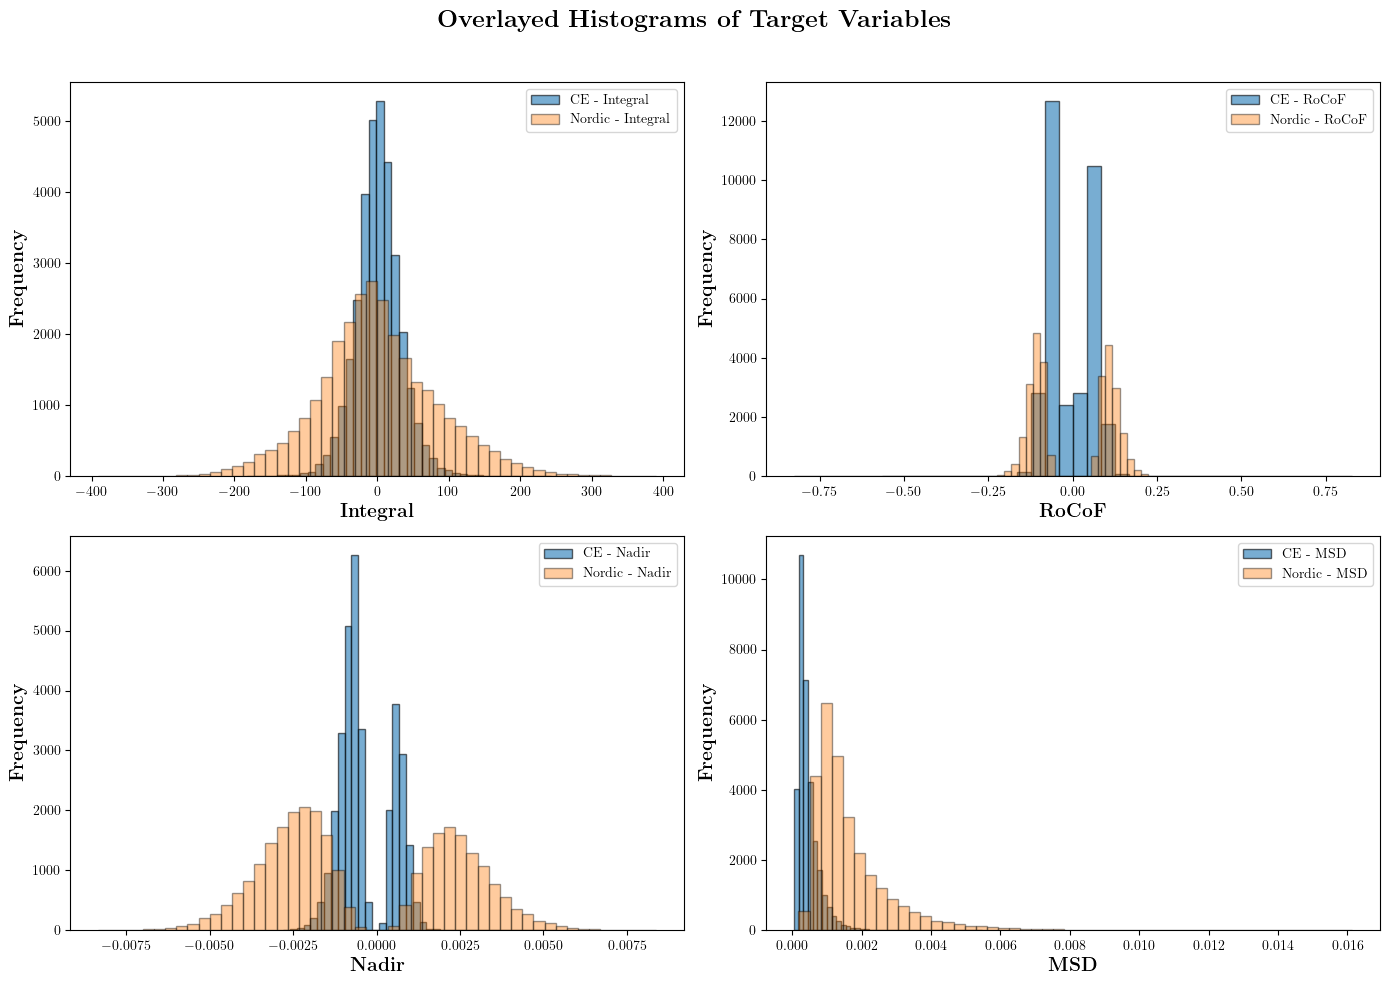

In [26]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

targets = ["f_integral", "f_ext", "f_rocof", "f_msd"]
target_names = ["Integral", "RoCoF", "Nadir", "MSD"]

plt.figure(figsize=(14, 10))

for i, (target, name) in enumerate(zip(targets, target_names), 1):
    plt.subplot(2, 2, i)
    
    plt.hist(outputs_ce[target].dropna(), bins=40, alpha=0.6, edgecolor='black', label=f"CE - {name}")
    plt.hist(outputs_nordic[target].dropna(), bins=50, alpha=0.4, edgecolor='black', label=f"Nordic - {name}")
    
    plt.xlabel(f"\\textbf{{{name}}}", fontsize=14)
    plt.ylabel("\\textbf{Frequency}", fontsize=14)
    #plt.title(f"\\textbf{{Histogram of {name} for CE and Nordic}}", fontsize=14)
    plt.legend(fontsize=10)

plt.suptitle("\\textbf{Overlayed Histograms of Target Variables}", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("../results/figures/histograms_ce_nordic.pdf", dpi=300, bbox_inches='tight', format="pdf")

plt.show()
